# Francisco Andrés Silva Concha - Desafío - Boosting Classifiers

**Requerimientos**
- Para esta sesión trabajaremos con una base de datos sobre rotación de clientes en una compañía de telecomunicaciones. El archivo contiene 3333 registros y 20 atributos. El vector objetivo a modelar es la tasa de rotación entre los clientes de una compañía de telecomunicaciones churn. Los atributos existentes hacen referencia a características de la cuenta de cada cliente.

**Lista de atributos:**
- State: Estado de Estados Unidos.
- Account Length: Tiempo en que la cuenta ha sido activada.
- Area Code: Código de área.
- International plan: Plan internacional activado.
- Voice mail plan: Plan de mensajes de voz activado.
- number_vmail_messages: Cantidad de mensajes de voz.
- total_day_minutes: Cantidad de minutos ocupados en la mañana.
- total_day_calls: Cantidad de llamadas realizadas en la mañana.
- total_day_charge: Cobros realizados en la mañana.
- total_eve_minutes: Cantidad de minutos ocupados en la tarde.
- total_eve_calls: Cantidad de llamadas realizadas en la tarde.
- total_eve_charge: Cobros realizados en la tarde.
- total_night_calls: Cantidad de llamadas realizadas en la noche.
- tota_night_minutes: Cantidad de minutos ocupados en la noche.
- total_night_charge: Cobros realizados en la noche.
- total_intl_minutes: Cantidad de minutos ocupados en llamadas internacionales.
- total_intl_calls: Cantidad de llamadas internacionales realizadas.
- total_intl_charge: Cobros realizados por llamadas internacionales.
- churn: 1 si el cliente se cambió de compañía, 0 de los contrario.

Los datos provienen del paquete AppliedPreditiveModeling de R.

# Ejercicio 1: Preprocesamiento
 
- Grafique el comportamiento distributivo de los atributos y de la variable dependiente. Reporte brevemente el comportamiento de las variables.
- En base al comportamiento de los atributos, considere si es necesario implementar alguna recodificación o transformación de atributo. Algunas normas a seguir:
    - Para las variables categóricas, recodifíquelas en variables binarias.
    - Para aquellas variables numéricas que presenten alto sesgo, pueden transformarlas con su logaritmo.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

df_train = pd.read_csv("churn_train.csv").drop(columns = 'Unnamed: 0')
df_test = pd.read_csv("churn_test.csv").drop(columns = 'Unnamed: 0')
#df = pd.concat([df_train, df_test])
df = df_train
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account_length                 3333 non-null   int64  
 2   area_code                      3333 non-null   object 
 3   international_plan             3333 non-null   object 
 4   voice_mail_plan                3333 non-null   object 
 5   number_vmail_messages          3333 non-null   int64  
 6   total_day_minutes              3333 non-null   float64
 7   total_day_calls                3333 non-null   int64  
 8   total_day_charge               3333 non-null   float64
 9   total_eve_minutes              3333 non-null   float64
 10  total_eve_calls                3333 non-null   int64  
 11  total_eve_charge               3333 non-null   float64
 12  total_night_minutes            3333 non-null   f

In [3]:
df.isnull().sum().sum() #Sólo para corroborar que el df no tiene datos nulos

0

In [20]:
#Notamos el balance en el vector objetivo
#df.churn.value_counts('%').round(3)d
df.churn.value_counts()

no     2850
yes     483
Name: churn, dtype: int64

C:\Users\silva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


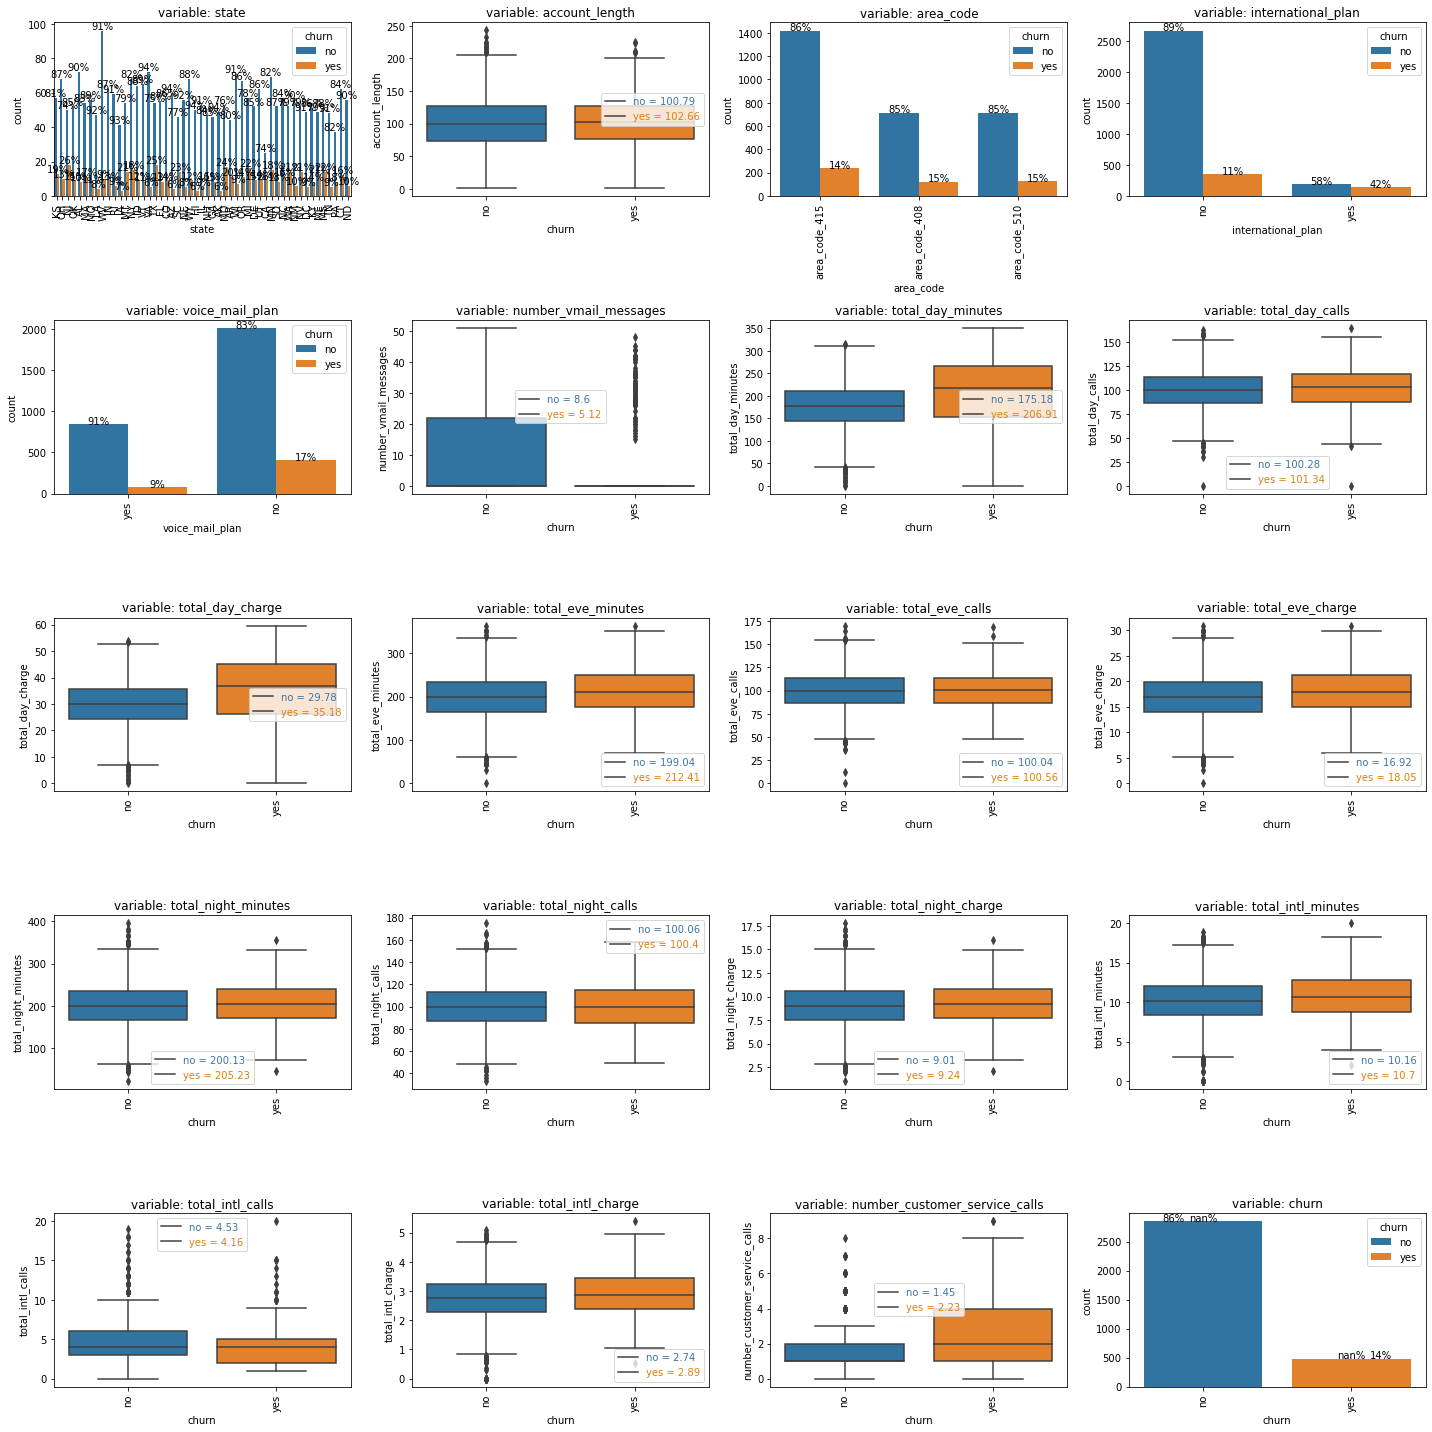

In [24]:
plt.rcParams["figure.figsize"] = (20, 20)

for n, i in enumerate(df.columns):
    plt.subplot(5,4, n+1)
    
    if i == 'churn':
        sns.countplot(df[i])
    
    if df[i].dtype == 'object':
        ax = sns.countplot(data=df, x=i, hue='churn')
        bars = ax.patches
        half = int(len(bars)/2)
        left_bars = bars[:half]
        right_bars = bars[half:]

        for left, right in zip(left_bars, right_bars):
            height_l = left.get_height()
            height_r = right.get_height()
            total = height_l + height_r

            ax.text(left.get_x() + left.get_width()/2., height_l + 1, '{0:.0%}'.format(height_l/total), ha="center")
            ax.text(right.get_x() + right.get_width()/2., height_r + 1, '{0:.0%}'.format(height_r/total), ha="center")
    else:
        sns.boxplot(data = df, x = 'churn', y = i)
        plt.legend(
            labels=['no = '+str(round(df[df["churn"] == 'no'][i].mean(),2)),
                    'yes = '+str(round(df[df["churn"] == 'yes'][i].mean(),2))],
            labelcolor = [(61/255,117/255,163/255),(218/255,128/255,21/255)]
        )
    plt.xticks(rotation = 90)
    plt.title(f"variable: {i}")

plt.tight_layout()

**Comentarios**

- state: En estado es difícil y en realidad largo notar cuando un estado es bastante distinto al gráfico countplot de la variable churn(por si sola).
- account_length: Las medias no parecieran ser distintas entre clases de churn.
- area_code: No se notan grandes diferencias entre las clases de churn por cada clase de esta variable.
- international_plan: Notas que en clientes que tienen plan internacional, la proporción de clientes que se cambia es bien distinta a la distribución de clases del Churn, sin embargo, no hay muchos casos aquí.
- voice_mail_plan: Notamos que los clientes con voice_mail_plan se suelen cambiar menos que los que no lo tienen.
- number_vmail_messages: los clientes que NO se cambian, suelen tener 25% más de number_vmail_messages que los que sí se cambian.
- total_day_minutes: Los clientes que se cambian suelen suelen hablar 30 minutos más al día que los que no se cambian.
- total_day_calls: Las medias no parecieran ser distintas entre clases de churn.
- total_day_charge: Los que se van tienden a gastar un 20% más en su plan que los que no se cambian.
- total_eve_minutes: No se notan grandes diferencias entre las clases de churn por cada clase de esta variable.
- total_eve_calls: No se notan grandes diferencias entre las clases de churn por cada clase de esta variable.
- total_eve_charge: No se notan grandes diferencias entre las clases de churn por cada clase de esta variable.
- total_night_minutes: No se notan grandes diferencias entre las clases de churn por cada clase de esta variable.
- total_night_calls: No se notan grandes diferencias entre las clases de churn por cada clase de esta variable.
- total_night_charge: No se notan grandes diferencias entre las clases de churn por cada clase de esta variable.
- total_intl_minutes: No se notan grandes diferencias entre las clases de churn por cada clase de esta variable.
- total_intl_calls: No se notan grandes diferencias entre las clases de churn por cada clase de esta variable.
- total_intl_charge: No se notan grandes diferencias entre las clases de churn por cada clase de esta variable.
- number_customer_service_calls: aquí notamos grandes diferencias, las personas que se cambian llaman un 50% más a servicio al cliente que los que no.
- churn: La proporción de clases es de 85% los que no se cambian y 15% los que sí se cambian (a grandes rasgos)


In [94]:
#codificamos el vector objetivo
df['churn'] = df['churn'].replace({"no":'0',"yes":'1'}).astype('int')

#codificamos las variables categóricas
df = pd.get_dummies(df,drop_first=True)

#Ya que usaremos adaboost y árboles de decisión, no necesitamos estandarizar las variables contínuas
#printeamos el head solo para mostrar las variables categóricas codificadas
df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,1,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,1,0,1,0


In [39]:
df.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn', 'state_AL', 'state_AR',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'state_WA', 'sta

# Ejercicio 2: Comparación de AdaBoost y Gradient Boosting

- Entrene los clasificadores AdaBoost y Gradient Boosting para mejorar su capacidad predictiva en la medida de lo posible. Para ello, implemente una búsqueda de grilla con las siguientes especificaciones:

**Modelo y Grilla**

- AdaBoostClassifier {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50,100, 500, 1000, 2000]}
- GradientBoostingClassifier {'learning_rate': [0.01, 0.1, 0.5],'n_estimators': [50, 100, 500, 1000, 2000], 'subsample': [0.1,0.5,0.9]}
**----------------------------------------------------------------------------------------------------------------------**
- Si el tiempo de computación es alto, puede implementar la búsqueda con 1 validación cruzada.
- Reporte las métricas para los mejores modelos

In [50]:
#param_grids
param_grid_ADA = {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50,100, 500, 1000, 2000]}
param_grid_GRA = {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 500, 1000, 2000], 'subsample': [0.1,0.5,0.9]}

#separamos las muestras
X = df.drop(columns='churn')
y = df.churn

#separamos X e Y en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

#entrenamos los modelos y fiteamos
grid_ADA = GridSearchCV(estimator= AdaBoostClassifier(), param_grid=param_grid_ADA, cv=10, n_jobs=-1, verbose=1).fit(X_train, y_train)
grid_GRA = GridSearchCV(estimator= GradientBoostingClassifier(), param_grid=param_grid_GRA, cv=10, n_jobs=-1, verbose=1).fit(X_train, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Fitting 10 folds for each of 45 candidates, totalling 450 fits


In [52]:
#generamos métricas de desempeño
results = pd.DataFrame()

for i in [grid_ADA, grid_GRA]:
    y_pred = i.predict(X_test)
    results = results.append({"model":str(i),
                    "accuracy":accuracy_score(y_test, y_pred),
                    "recall":recall_score(y_test, y_pred),
                    "precision":precision_score(y_test, y_pred),
                    "f1-score":f1_score(y_test, y_pred)
                   }, ignore_index=True
                  )
    
results

,accuracy,f1-score,model,precision,recall
0,0.892727,0.500000,"GridSearchCV(cv=10, estimator=AdaBoostClassifi...",0.686047,0.393333
1,0.952727,0.811594,"GridSearchCV(cv=10, estimator=GradientBoosting...",0.888889,0.746667


**Comentarios**

El algoritmo "GradientBoostingClassifier" presenta mejores métricas en cada una de ellas que AdaBoost, sería bueno quitar algunas variables que pueden estar causando ruido para ambos modelos.

# Ejercicio 3: Principales factores asociados

- Con el mejor modelo, reporte la importancia relativa de los atributos y comente cuáles son los que aumentan la probabilidad de fuga en los clientes.

**Tip:** Pueden implementar la función plot_importance que se encuentra en la lectura de Bagging y Random Forest.

In [53]:
#reportamos los parámetros para el mejor modelo encontrado por GridSearchCV
grid_GRA.best_params_

{'learning_rate': 0.01, 'n_estimators': 500, 'subsample': 0.9}

In [62]:
#generamos el modelo con los parámetros encontrados por GridSearchCV
model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=500, subsample=0.9, verbose=0).fit(X_train, y_train)

<AxesSubplot:>

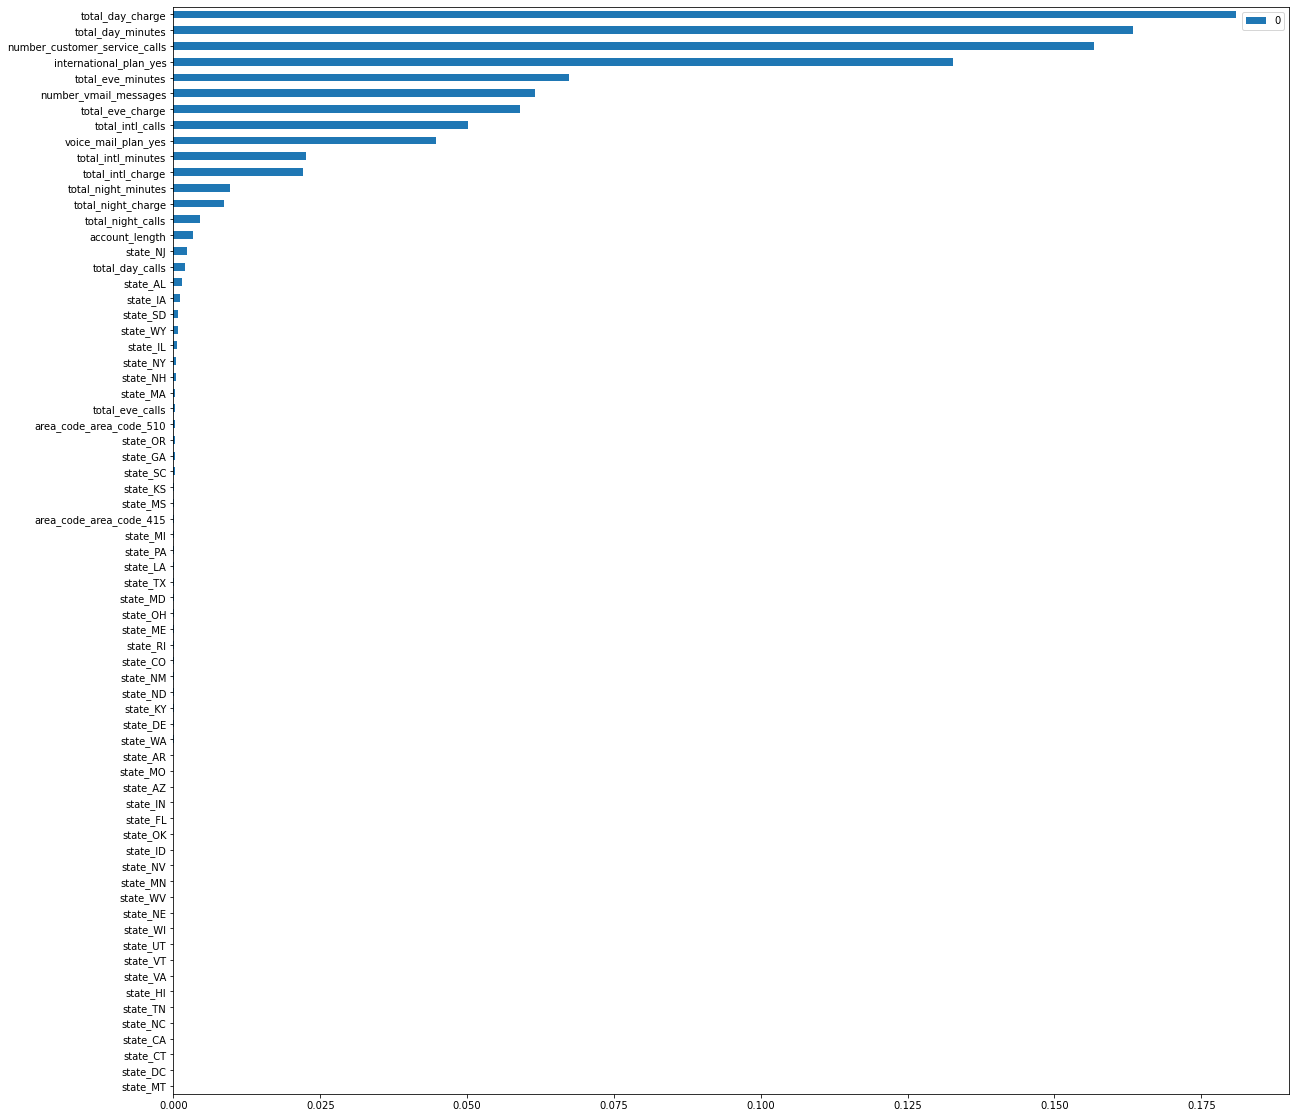

In [71]:
#graficamos la importancia que este modelo le dió a cada uno de los atributos de X_train
pd.DataFrame(model.feature_importances_, index=X.columns).sort_values(by=0).plot(kind='barh')

In [90]:
new_df = pd.DataFrame(model.feature_importances_, index=X.columns).sort_values(by=0, ascending=False).rename(columns={0:'importancia'})[:11]
new_df['acumulado'] = new_df['importancia'].cumsum()
new_df

,importancia,acumulado
total_day_charge,0.180968,0.180968
total_day_minutes,0.163327,0.344296
number_customer_service_calls,0.156796,0.501092
international_plan_yes,0.132811,0.633903
total_eve_minutes,0.067327,0.701230
number_vmail_messages,0.061539,0.762770
total_eve_charge,0.059044,0.821813
total_intl_calls,0.050224,0.872037
voice_mail_plan_yes,0.044700,0.916737
total_intl_minutes,0.022544,0.939281


**Comentario**

No sé si son las que aumentan la probabilidad de fuga, pero el siguiente listado son las variables que más influyen en ello acorde al modelo generado

1) total_day_charge
2) total_day_minutes
3) number_customer_service_calls
4) international_plan_yes
5) total_eve_minutes
6) number_vmail_messages
7) total_eve_charge
8) total_intl_calls
9) voice_mail_plan_yes
10) total_intl_minutes
11) total_intl_charge

# Ejercicio 4: Probabilidad de fuga

- El gerente general necesita saber en qué estados hay una mayor probabilidad de fuga de clientes. Para ello, identifique los tres estados con una mayor probabilidad de fuga.
- Implemente el modelo predictivo con el archivo <code>churn_test.csv</code>.
- Recuerde que para obtener la probabilidad de clase, debe utilizar la función predict_proba del modelo.

In [100]:
#guardamos la columna "state" de df_test para usarla despues
df_test_state = df_test.state

#teatment para df_test
df_test = df_test.drop(columns='churn')
df_test = pd.get_dummies(df_test, drop_first=True)

#confirmamos que al hacer el mismo treatment en df_test, las columnas no se alteran (sino el modelo no funcionará)
df_test.columns == X_train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [105]:
#predecimos y guardamos el resultado en el df "pedida_gg"
pedida_gg = pd.DataFrame(model.predict_proba(df_test), columns=['retención', 'prob_fuga'])[['prob_fuga']]

#agregamos la columna que guardamos antes y mostramos el df para saber que todo está bien
pedida_gg['estado'] = df_test_state
pedida_gg

,prob_fuga,estado
0,0.036105,HI
1,0.067297,MT
2,0.127535,OH
3,0.046431,NM
4,0.028235,SC
...,...,...
1662,0.085497,HI
1663,0.049934,WV
1664,0.036331,DC
1665,0.029490,DC


In [112]:
# agrupamos segun estado, promediamos la probabilidad de fuga presente por estado y ordenamos la probabilidad de mayor a menor, filtramos por top 3
pedida_gg.groupby('estado')[['prob_fuga']].mean().sort_values(by='prob_fuga', ascending=False)[0:3]

,prob_fuga
estado,
NJ,0.242350
OK,0.238832
AZ,0.200931


**Comentario**

Don GG:

Los 3 estados donde existe una mayor probabilidad de fuga según los datos entregados y el acorde a ciertos modelos generados, los resultados arrojan que los 3 estados con mayor probabilidad de fuga son:

1) **NJ:** 24,2%
2) **OK:** 23,8%
3) **AZ:** 20,0%

Cualquier duda por favor escríbame.

Saludos cordiales